# WeatherPy
----


In [3]:
# Dependencies and Setup
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"



## City Data

In [16]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Gather Weather Data
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [17]:
#initialize openweathermap url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#initiate a counter
counter = 0

#create lists to store data
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
cntry = []
dt = []
city_ls = []

print("Beginning data retrieval...")
for city in cities:
    counter += 1
    response = requests.get(query_url + city).json()
    print(f"Processing record {counter} | City: {city}")
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"] )
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        cntry.append(response["sys"]["country"])
        dt.append(response["dt"])
        city_ls.append(city)
    except:
        print(f"Could not find all data for city: {city}")
    
    time.sleep(1)


Beginning data retrieval...
Processing record 1 | City: saskylakh
Processing record 2 | City: illoqqortoormiut
Could not find all data for city: illoqqortoormiut
Processing record 3 | City: lucapa
Processing record 4 | City: palmer
Processing record 5 | City: vardo
Processing record 6 | City: puerto ayora
Processing record 7 | City: barnstaple
Processing record 8 | City: los llanos de aridane
Processing record 9 | City: ushuaia
Processing record 10 | City: qaanaaq
Processing record 11 | City: klisura
Processing record 12 | City: ginir
Processing record 13 | City: pevek
Processing record 14 | City: forestville
Processing record 15 | City: east london
Processing record 16 | City: barrow
Processing record 17 | City: kloulklubed
Processing record 18 | City: attawapiskat
Could not find all data for city: attawapiskat
Processing record 19 | City: tuktoyaktuk
Processing record 20 | City: tasiilaq
Processing record 21 | City: nouadhibou
Processing record 22 | City: harbour breton
Processing re

Processing record 193 | City: tura
Processing record 194 | City: havre-saint-pierre
Processing record 195 | City: vila
Processing record 196 | City: orlik
Processing record 197 | City: dzilam gonzalez
Processing record 198 | City: medea
Processing record 199 | City: vrangel
Processing record 200 | City: puerto colombia
Processing record 201 | City: lagos
Processing record 202 | City: kodiak
Processing record 203 | City: bisira
Processing record 204 | City: mehamn
Processing record 205 | City: port elizabeth
Processing record 206 | City: tsihombe
Could not find all data for city: tsihombe
Processing record 207 | City: newport beach
Processing record 208 | City: kapaa
Processing record 209 | City: kavaratti
Processing record 210 | City: jamestown
Processing record 211 | City: vanavara
Processing record 212 | City: college
Processing record 213 | City: biaora
Processing record 214 | City: duldurga
Processing record 215 | City: coahuayana
Processing record 216 | City: komsomolskiy
Processi

Processing record 383 | City: kaina
Processing record 384 | City: moose factory
Processing record 385 | City: longlac
Could not find all data for city: longlac
Processing record 386 | City: san cristobal
Processing record 387 | City: solnechnyy
Processing record 388 | City: bernalillo
Processing record 389 | City: saldanha
Processing record 390 | City: espoo
Processing record 391 | City: bolshaya rechka
Processing record 392 | City: oda
Processing record 393 | City: pangkalanbuun
Processing record 394 | City: byron bay
Processing record 395 | City: ciudad bolivar
Processing record 396 | City: imbituba
Processing record 397 | City: wahiawa
Processing record 398 | City: grand gaube
Processing record 399 | City: antequera
Processing record 400 | City: kanniyakumari
Processing record 401 | City: sokoni
Processing record 402 | City: poronaysk
Processing record 403 | City: conakry
Processing record 404 | City: verkhoyansk
Processing record 405 | City: touba
Processing record 406 | City: port

Processing record 578 | City: wageningen
Processing record 579 | City: taoudenni
Processing record 580 | City: clyde river
Processing record 581 | City: barcelos
Processing record 582 | City: exeter
Processing record 583 | City: ahipara
Processing record 584 | City: karak
Processing record 585 | City: fortuna
Processing record 586 | City: jhikargachha
Could not find all data for city: jhikargachha
Processing record 587 | City: miedzyrzecz
Processing record 588 | City: itaituba
Processing record 589 | City: temaraia
Could not find all data for city: temaraia
Processing record 590 | City: talaya
Processing record 591 | City: kapuskasing
Processing record 592 | City: marapanim
Processing record 593 | City: buarcos
Processing record 594 | City: buta
Processing record 595 | City: east liverpool
Processing record 596 | City: tidore
Could not find all data for city: tidore
Processing record 597 | City: changji
Processing record 598 | City: jumla
Processing record 599 | City: pangai
Processing

### Save Results


In [18]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_ls,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": cntry,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-22.32,84,0,6.64,RU,1613012657
1,lucapa,-8.4192,20.7447,64.81,96,100,2.68,AO,1613012651
2,palmer,42.1584,-72.3287,16.00,73,90,1.83,US,1613012060
3,vardo,70.3705,31.1107,24.33,86,100,13.35,NO,1613012760
4,puerto ayora,-0.7393,-90.3518,75.00,99,79,1.01,EC,1613012762


In [19]:
#save weather data to csv output file
try:
    weather_data.to_csv(output_data_file, index=False)
    print(f"Weather data saved to: {output_data_file}")
except:
    print(f"City weather data not saved.")

Weather data saved to: ../output_data/cities.csv


# Inspect the data and remove the cities where the humidity > 100%.

In [20]:
#set csv file
weather_csv = "../output_data/cities.csv"

#read csv into dataframe
weather_df = pd.read_csv(weather_csv)

#determine original row count
orig_len = len(weather_df)

#drop dataframe rows where the humidity is above 100
indexes_to_drop = weather_df.loc[weather_df["Humidity"]>100, :].index

#drop any rows within current dataframe where humidity above 100%
weather_df.drop(indexes_to_drop, inplace=True)

#determine new row count
dropped_index_len = len(weather_df)

#determine if rows were dropped due to over 100 humidity
if orig_len == dropped_index_len:
    print(f"There were no records with humidity above 100%.")
    
else:
    dropped_row_count = orig_len - dropped_index_len
    print(f"There were {dropped_row_count} rows dropped. The new row count is {dropped_index_len}.")
    
weather_df.head()

There were no records with humidity above 100%.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-22.32,84,0,6.64,RU,1613012657
1,lucapa,-8.4192,20.7447,64.81,96,100,2.68,AO,1613012651
2,palmer,42.1584,-72.3287,16.00,73,90,1.83,US,1613012060
3,vardo,70.3705,31.1107,24.33,86,100,13.35,NO,1613012760
4,puerto ayora,-0.7393,-90.3518,75.00,99,79,1.01,EC,1613012762


# Latitude Analyses

## Temperature vs. Latitude Plot

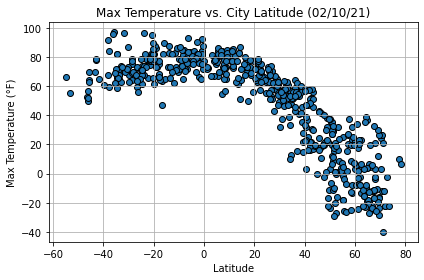

This plot shows that there may be a relationship 
between temperature and proximity to the equator. 
The closer to the equator a city is, the higher it's maximum temperature is.


In [21]:
lat_axis = weather_df["Lat"]
temp_axis = weather_df["Max Temp"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, temp_axis, edgecolors="black")
plt.ylabel("Max Temperature (\N{DEGREE SIGN}F)")
plt.xlabel("Latitude")
plt.title(f"Max Temperature vs. City Latitude ({today})")
plt.grid()
plt.tight_layout()

plt.savefig("../output_data/Temp_vs_Lat.png")

plt.show()

print(f"This plot shows that there may be a relationship \n\
between temperature and proximity to the equator. \n\
The closer to the equator a city is, the higher it's maximum temperature is.")

## Humidity vs. Latitude Plot

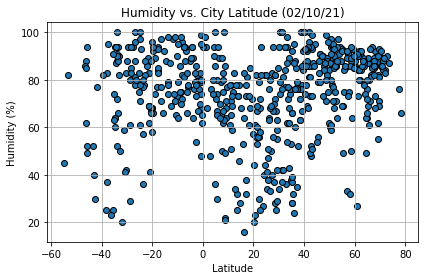

This plot shows humidity in relation to 
proximity to the equator. However, this plot does not seem
to indicate a change in humidity based on proximity to the equator.


In [22]:
lat_axis = weather_df["Lat"]
humid_axis = weather_df["Humidity"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, humid_axis, edgecolors="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"Humidity vs. City Latitude ({today})")
plt.grid()
plt.tight_layout()

plt.savefig("../output_data/Humidity_vs_Lat.png")

plt.show()

print(f"This plot shows humidity in relation to \n\
proximity to the equator. However, this plot does not seem\n\
to indicate a change in humidity based on proximity to the equator.")

## Cloudiness vs. Latitude Plot

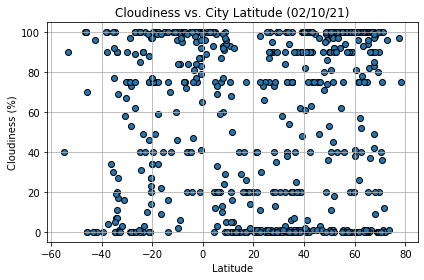

This plot shows cloudiness in relation to 
proximity to the equator. However, this plot does not seem
to indicate a change in cloudiness based on proximity to the equator.


In [23]:
lat_axis = weather_df["Lat"]
cloud_axis = weather_df["Cloudiness"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, cloud_axis, edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"Cloudiness vs. City Latitude ({today})")
plt.grid()
plt.tight_layout()

plt.savefig("../output_data/Cloudiness_vs_Lat.png")

plt.show()

print(f"This plot shows cloudiness in relation to \n\
proximity to the equator. However, this plot does not seem\n\
to indicate a change in cloudiness based on proximity to the equator.")

## Wind Speed vs. Latitude Plot

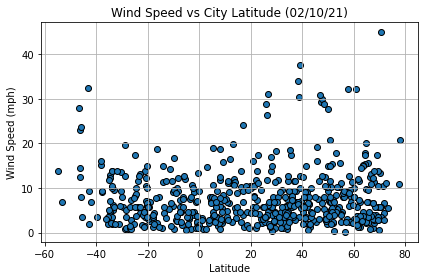

This plot shows wind speed in relation to 
proximity to the equator. However, this plot does not seem
to indicate a change in wind speed based on proximity to the equator.


In [24]:
lat_axis = weather_df["Lat"]
wind_axis = weather_df["Wind Speed"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, wind_axis, edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"Wind Speed vs City Latitude ({today})")
plt.grid()
plt.tight_layout()

plt.savefig("../output_data/Wind_vs_Lat.png")

plt.show()

print(f"This plot shows wind speed in relation to \n\
proximity to the equator. However, this plot does not seem\n\
to indicate a change in wind speed based on proximity to the equator.")

## Linear Regression
The following models use these r-value descriptors:
 - 0.00-0.19: very weak
 - 0.20-0.39: weak
 - 0.40-0.59: moderate 
 - 0.60-0.79: strong
 - 0.80-1.00: very strong

In [25]:
#Split weather data into northern souther hemispheres
north_weather_df = weather_df.loc[weather_df["Lat"]>=0, :]
south_weather_df = weather_df.loc[weather_df["Lat"]<0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8786303325794395


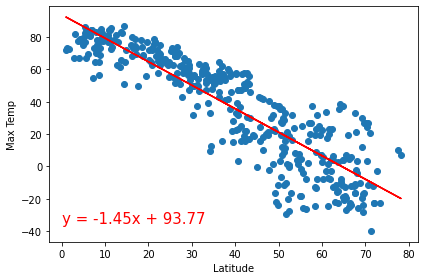

This model shows the relationship between temperature
and proximity to the equator for cities in the Northern Hemisphere.
This shows a very strong relationship, such that, as a city gets further
from the equator, it's maximum temperature decreases.


In [36]:
lat_axis = north_weather_df["Lat"]
temp_axis = north_weather_df["Max Temp"]

plt.scatter(lat_axis, temp_axis)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(0,-35),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/NorthHem_MaxTemp_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between temperature\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a very strong relationship, such that, as a city gets further\n\
from the equator, it's maximum temperature decreases.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.40969462709927046


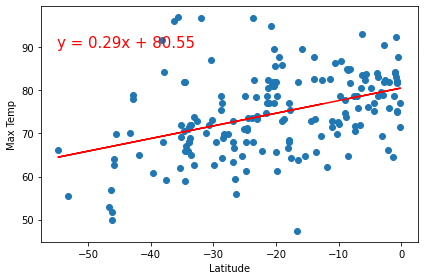

This model shows the relationship between temperature
and proximity to the equator for cities in the Southern Hemisphere.
This shows a moderate relationship, such that, as a city gets closer
to the equator, it's maximum temperature may increase.


In [37]:
lat_axis = south_weather_df["Lat"]
temp_axis = south_weather_df["Max Temp"]

plt.scatter(lat_axis, temp_axis)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/SouthHem_MaxTemp_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between temperature\n\
and proximity to the equator for cities in the Southern Hemisphere.\n\
This shows a moderate relationship, such that, as a city gets closer\n\
to the equator, it's maximum temperature may increase.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.35666147640107726


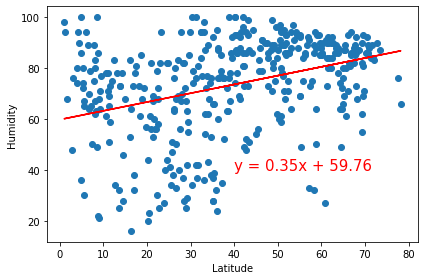

This model shows the relationship between humidity
and proximity to the equator for cities in the Northern Hemisphere.
This shows a weak relationship, such that, as a city gets further
from the equator, it's humidity may increase.


In [38]:
lat_axis = north_weather_df["Lat"]
humid_axis = north_weather_df["Humidity"]

plt.scatter(lat_axis, humid_axis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humid_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/NorthHem_Humidity_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between humidity\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets further\n\
from the equator, it's humidity may increase.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.25173823540254087


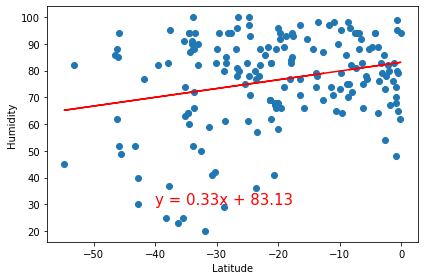

This model shows the relationship between humidity
and proximity to the equator for cities in the Northern Hemisphere.
This shows a weak relationship, such that, as a city gets closer
to the equator, it's humidity may increase.


In [39]:
lat_axis = south_weather_df["Lat"]
humid_axis = south_weather_df["Humidity"]

plt.scatter(lat_axis, humid_axis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humid_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/SouthHem_Humidity_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between humidity\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets closer\n\
to the equator, it's humidity may increase.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2000146595454007


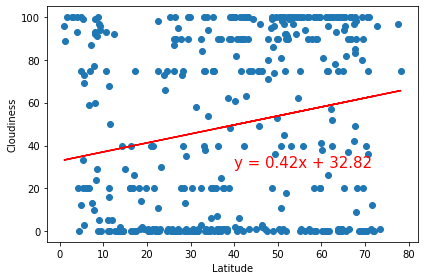

This model shows the relationship between cloudiness
and proximity to the equator for cities in the Northern Hemisphere.
This shows a weak relationship, such that, as a city gets further
from the equator, it's cloudiness may increase.


In [40]:
n_lat_axis = north_weather_df["Lat"]
n_cloud_axis = north_weather_df["Cloudiness"]

plt.scatter(n_lat_axis, n_cloud_axis)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_axis, n_cloud_axis)

#y=mx+b
regress_values = n_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(n_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/NorthHem_Cloudiness_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between cloudiness\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets further\n\
from the equator, it's cloudiness may increase.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.31859034099894257


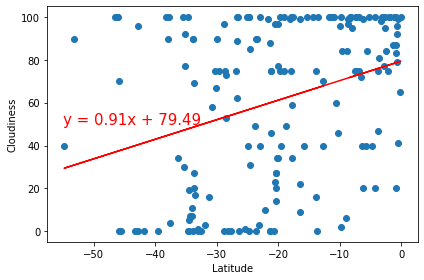

This model shows the relationship between cloudiness
and proximity to the equator for cities in the Southern Hemisphere.
This shows a weak relationship, such that, as a city gets closer
to the equator, it may be cloudier.


In [41]:
s_lat_axis = south_weather_df["Lat"]
s_cloud_axis = south_weather_df["Cloudiness"]

plt.scatter(s_lat_axis, s_cloud_axis)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_axis, s_cloud_axis)

#y=mx+b
regress_values = s_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(s_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/SouthHem_Cloudiness_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between cloudiness\n\
and proximity to the equator for cities in the Southern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets closer\n\
to the equator, it may be cloudier.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.058422280666155485


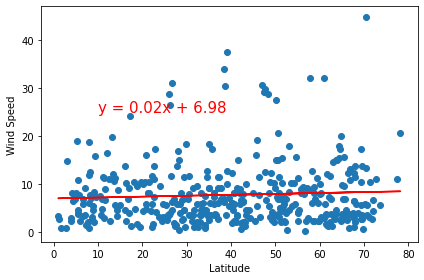

This model shows the relationship between wind speed
and proximity to the equator for cities in the Northern Hemisphere.
This shows a very weak relationship, such that, as a city gets further
from the equator, there is no indication how windy it will be.


In [42]:
n_lat_axis = north_weather_df["Lat"]
n_wind_axis = north_weather_df["Wind Speed"]

plt.scatter(n_lat_axis, n_wind_axis)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_axis, n_wind_axis)

#y=mx+b
regress_values = n_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(n_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/NorthHem_WindSpeed_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between wind speed\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a very weak relationship, such that, as a city gets further\n\
from the equator, there is no indication how windy it will be.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3104958326296007


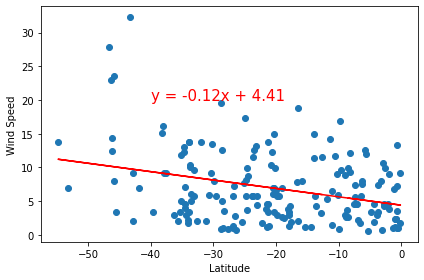

This model shows the relationship between wind speed
and proximity to the equator for cities in the Southern Hemisphere.
This shows a weak relationship, such that, as a city gets closer
to the equator, the city may be less windy.


In [43]:
s_lat_axis = south_weather_df["Lat"]
s_wind_axis = south_weather_df["Wind Speed"]

plt.scatter(s_lat_axis, s_wind_axis)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_axis, s_wind_axis)

#y=mx+b
regress_values = s_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(s_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()

plt.savefig("../output_data/SouthHem_WindSpeed_vs_Lat_LinRegress.png")

plt.show()

print(f"This model shows the relationship between wind speed\n\
and proximity to the equator for cities in the Southern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets closer\n\
to the equator, the city may be less windy.")

### Data Analysis
    1. In the Northern Hemisphere there is a strong relationship between proximity to the equator and a city's maximum temperature. Cities closer to the equator have greater maximum temperatures. This is demonstrated in the figure: Northern Hemisphere - Max Temp vs. Latitude Linear Regression. 
    
    2.  In the Souther Hemisphere there is a moderate relationship between proximity to the equator and a city's maximum temperature. Cities closer to the equatore are more likely to have a greate maximum temperature as indicated by figure: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
    
    3. There is no correlation to wind speed in relation to the proximity to the equator as evidenced by figure: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.